In [13]:
import numpy as np
import matplotlib.pyplot as plt

## 正規分布

In [2]:
a = np.array([1,2,3,4,5])

In [3]:
avr = np.average(a)
σ = np.std(a)

In [4]:
print(avr,σ)

3.0 1.4142135623730951


In [9]:
#平均50,標準偏差10の乱数を1000個生成
x = np.random.normal(50,10,1000)

(array([ 2.,  0.,  0.,  1.,  0.,  1.,  4.,  3.,  5.,  5.,  8., 13., 17.,
        11., 13., 11., 21., 37., 25., 38., 31., 44., 48., 47., 39., 44.,
        42., 52., 59., 43., 45., 34., 29., 32., 28., 29., 21., 22., 19.,
        16., 12.,  6., 11., 14.,  6.,  3.,  3.,  2.,  3.,  1.]),
 array([19.09289952, 20.2390071 , 21.38511468, 22.53122226, 23.67732985,
        24.82343743, 25.96954501, 27.11565259, 28.26176017, 29.40786776,
        30.55397534, 31.70008292, 32.8461905 , 33.99229808, 35.13840567,
        36.28451325, 37.43062083, 38.57672841, 39.72283599, 40.86894358,
        42.01505116, 43.16115874, 44.30726632, 45.4533739 , 46.59948148,
        47.74558907, 48.89169665, 50.03780423, 51.18391181, 52.33001939,
        53.47612698, 54.62223456, 55.76834214, 56.91444972, 58.0605573 ,
        59.20666489, 60.35277247, 61.49888005, 62.64498763, 63.79109521,
        64.93720279, 66.08331038, 67.22941796, 68.37552554, 69.52163312,
        70.6677407 , 71.81384829, 72.95995587, 74.10606345,

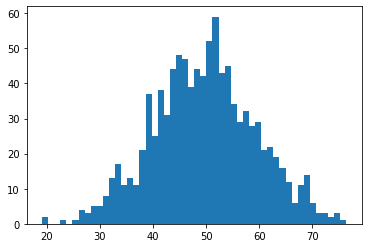

In [10]:
plt.hist(x,bins =50)#bins:棒の数

In [12]:
np.average(x),np.std(x)

(49.678480818015515, 9.630838874945015)

##　活性化関数

### ステップ関数


\begin{align}
    y = 
    \begin{cases}
    0 & (x\leq 0) \\
    1 & (x > 0)
    \end{cases}
\end{align}

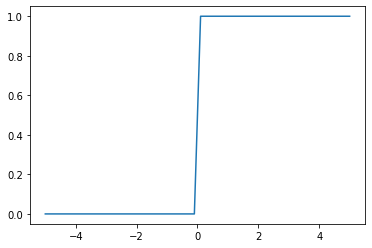

In [14]:
#ステップ関数
def step_function(x):
    return np.where(x<=0,0,1)

x = np.linspace(-5,5)
y = step_function(x)

plt.plot(x,y)
plt.show()

### シグモイド関数

\begin{align}
    y = \frac{1}{1+e^{-x}}
\end{align}

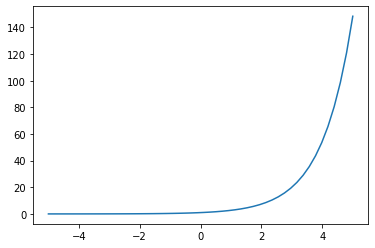

In [15]:
def sigmoid_function(x):
    return 1/(np.exp(-x))

x = np.linspace(-5,5)
y = sigmoid_function(x)

plt.plot(x,y)
plt.show()

### tanh 

\begin{align}
    y = \frac{e^x -e^{-x}}{e^x +e^{-x}}
\end{align}

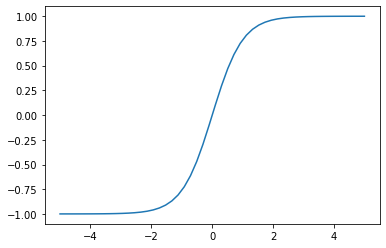

In [16]:
def tanh_function(x):
    return np.tanh(x)

y = tanh_function(x)

plt.plot(x,y)
plt.show()

### ReLU 

\begin{align}
    y = 
    \begin{cases}
    0 & (x\leq 0) \\
    x & (x > 0)
    \end{cases}
\end{align}

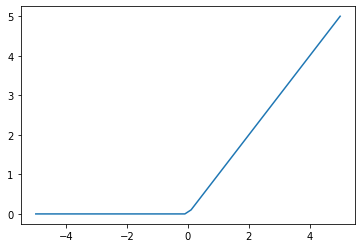

In [17]:
def relu_function(x):
    return np.where(x <=0,0,x)

y = relu_function(x)

plt.plot(x,y)
plt.show()

### Leaky ReLU

\begin{align}
    y = 
    \begin{cases}
    0.01x & (x\leq 0) \\
    x & (x > 0)
    \end{cases}
\end{align}

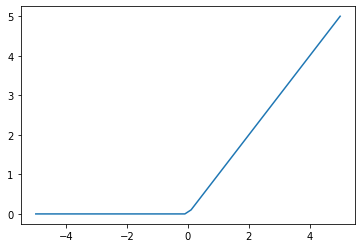

In [19]:
def leakey_relu_function(x):
    return np.where(x <=0,0.01*x,x)

y = relu_function(x)

plt.plot(x,y)
plt.show()

### 恒等関数

\begin{align}
    y=x
\end{align}

### ソフトマックス関数 

活性化関数を出力を$y$,入力を$x$,同じ層のニューロンの数を$n$とする

\begin{align}
    y = \frac{e^x}{\sum _{k=1}^n e^{x_k}}
\end{align}

このとき,$0<y<1$となるためソフトマックス関数はニューロンが対応する枠に分類される確率を表現することができる

In [21]:
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x))

In [22]:
y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]


## ニューラルネットワークの実装

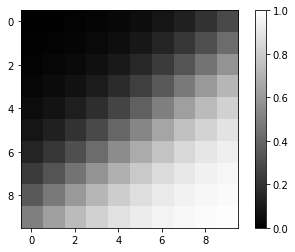

In [27]:
#入力
X = np.arange(-1.0,1.0,0.2)
Y = np.arange(-1.0,1.0,0.2)

#出力を格納する10×10グリッド
Z = np.zeros((10,10))

#x,y座標の入力の重み
w_x = 2.5
w_y = 3.0

#バイアス
bias = 0.1

#グリッドの各マスでニューロンの演算
for i in range(10):
    for j in range(10):
        #入力と重みの積の総和+バイアス
        u = X[i]*w_x + Y[j]*w_y + bias
        #グリッドに出力を格納
        y = 1/(1+np.exp(-u))
        Z[j][i] = y

#グリッドの表示
plt.imshow(Z,"gray",vmin =0.0,vmax =1.0)
plt.colorbar()
plt.show()

### ニューラルネットワーク(回帰)

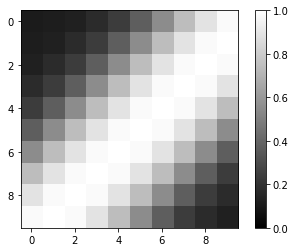

In [35]:
#x,y座標
X = np.arange(-1.0,1.0,0.2)
Y = np.arange(-1.0,1.0,0.2)

#出力を格納する10×10のグリッド
Z = np.zeros((10,10))

#重み
w_im = np.array([[4.0,4.0],
                 [4.0,4.0]]) #中間層2×2の行列
w_mo = np.array([[1.0],
                 [-1.0]]) #出力層2×1の行列

#バイアス
b_im = np.array([3.0,-3.0])
b_mo = np.array([0.1])


#中間層
def middle_layer(x,w,b):
    u = np.dot(x,w) + b
    return 1/(1+np.exp(-u)) #シグモイド関数

#出力層
def output_layer(x,w,b):
    u =np.dot(x,w) + b #恒等関数
    return u 

#グリッドの各マスでニューラルネットワークの演算
for i in range(10):
    for j in range(10):
        
        #順伝播
        inp = np.array([X[i],Y[j]]) #入力層
        mid = middle_layer(inp,w_im,b_im) #中間層
        out = output_layer(mid,w_mo,b_mo) #出力層
        
        #グリッドにNNの出力を格納
        Z[j][i] = out[0]
        
#グリッドの表示
plt.imshow(Z,"gray",vmin = 0.0,vmax = 1.0)
plt.colorbar()
plt.show()

### ニューラルネットワーク(分類)

回帰の際と異なり、出力層にはニューロンが二つある

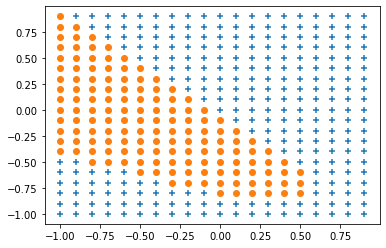

In [39]:
#x,y座標
X = np.arange(-1.0,1.0,0.1)
Y = np.arange(-1.0,1.0,0.1)

#重み
w_im = np.array([[1.0,2.0],
                 [2.0,3.0]]) #中間層2×2の行列
w_mo = np.array([[-1.0,1.0],
                 [1.0,-1.0]]) #出力層2×2の行列

#バイアス
b_im = np.array([0.3,-0.3]) #中間層
b_mo = np.array([0.4,0.1]) #出力層


#中間層
def middle_layer(x,w,b):
    u = np.dot(x,w) + b
    return 1/(1+np.exp(-u)) #シグモイド関数

#出力層
def output_layer(x,w,b):
    u =np.dot(x,w) + b #恒等関数
    return np.exp(u)/np.sum(np.exp(u)) #ソフトマックス関数

#分類結果を格納するリスト
x_1=[]
y_1=[]
x_2=[]
y_2=[]




#グリッドの各マスでニューラルネットワークの演算
for i in range(20):
    for j in range(20):
        
        #順伝播
        inp = np.array([X[i],Y[j]]) #入力層
        mid = middle_layer(inp,w_im,b_im) #中間層
        out = output_layer(mid,w_mo,b_mo) #出力層
        
        #確率の代償を比較し,分類する
        if out[0] >out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])

        
#散布図の表示
plt.scatter(x_1,y_1,marker="+")
plt.scatter(x_2,y_2,marker="o")
plt.show()